# Project 01 
 by Hafsa and Nicole

# How did national murder rates change in 2020 from previous years?

### Below we will explore crime statistics from the Federal Bureau of Investigation to answer this question.

In [25]:
# Dependencies and modules:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
import statistics
import math
from scipy import stats

# Import API key
from api_keys import FBI_api

In [26]:
states = {'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [27]:
# base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key
# city = 'st. louis'

# req = requests.get(base_url + f'&q={city}')
# print()

# #create a json output of the data

# json_data = req.json()
# print(json_data)           <-- This is the code block that we used in Week 5. I copied it here to use as a template.



# Endpoint: /api/summarized/query            <---Here are all parts needed to build HTTP,
# Base URL: api.usa.gov/crime/fbi/sapi/          I just can't figure out the proper order and syntax.
# My api: FBI_api    

    
base_url = 'https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2010/2020?API_KEY=' + FBI_api

#

req = requests.get(base_url)
print(req)  # response 200!

json_data = req.json()
print(json_data)

<Response [200]>
{'results': [{'state_id': None, 'state_abbr': '', 'year': 2015, 'population': 320896618, 'violent_crime': 1199310, 'homicide': 15883, 'rape_legacy': 91261, 'rape_revised': 126134, 'robbery': 328109, 'aggravated_assault': 764057, 'property_crime': 8024115, 'burglary': 1587564, 'larceny': 5723488, 'motor_vehicle_theft': 713063, 'arson': 44139}, {'state_id': None, 'state_abbr': '', 'year': 2010, 'population': 309330219, 'violent_crime': 1251248, 'homicide': 14722, 'rape_legacy': 85593, 'rape_revised': None, 'robbery': 369089, 'aggravated_assault': 781844, 'property_crime': 9112625, 'burglary': 2168459, 'larceny': 6204601, 'motor_vehicle_theft': 739565, 'arson': 56005}, {'state_id': None, 'state_abbr': '', 'year': 2011, 'population': 311587816, 'violent_crime': 1206031, 'homicide': 14661, 'rape_legacy': 84175, 'rape_revised': None, 'robbery': 354772, 'aggravated_assault': 752423, 'property_crime': 9052743, 'burglary': 2185140, 'larceny': 6151095, 'motor_vehicle_theft': 716

In [46]:
#data we want: year, homicide, population, state, state abr
#make a null set and append from api
murder_by_state_2010= {'State ID':[], 'State Abbreviation': [], 'Year': [], 'Population': [], 'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"
    try:
    
         
        req = requests.get(base_url+ f'{state_abbr}/2010/2010/?API_KEY={FBI_api}')
        
        data = req.json()
    

        murder_by_state_2010['State ID'].append(data['results'][0]['state_id'])
        murder_by_state_2010['State Abbreviation'].append(data['results'][0]['state_abbr'])
        murder_by_state_2010['Year'].append(data['results'][0]['year'])
        murder_by_state_2010['Population'].append(data['results'][0]['population'])
        murder_by_state_2010['Number of Homicides'].append(data['results'][0]['homicide'])
    except:
        pass
        
 

In [48]:
murder_by_state_2010= pd.DataFrame.from_dict(murder_by_state_2010)
murder_by_state_2010

,State ID,State Abbreviation,Year,Population,Number of Homicides
0,1,AK,2010,714146,31
1,2,AL,2010,4785401,275
2,3,AR,2010,2921588,134
3,5,AZ,2010,6413158,408
4,6,CA,2010,37338198,1809
5,7,CO,2010,5047692,129
6,8,CT,2010,3575498,133
7,10,DC,2010,604912,132
8,11,DE,2010,899792,51
9,12,FL,2010,18838613,987


In [51]:
murder_by_state_2020= {'State ID':[], 'State Abbreviation': [], 'Year': [], 'Population': [], 'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"
    try:
    
         
        req = requests.get(base_url+ f'{state_abbr}/2020/2020/?API_KEY={FBI_api}')
        
        data = req.json()
    

        murder_by_state_2020['State ID'].append(data['results'][0]['state_id'])
        murder_by_state_2020['State Abbreviation'].append(data['results'][0]['state_abbr'])
        murder_by_state_2020['Year'].append(data['results'][0]['year'])
        murder_by_state_2020['Population'].append(data['results'][0]['population'])
        murder_by_state_2020['Number of Homicides'].append(data['results'][0]['homicide'])
    except:
        pass

In [52]:
murder_by_state_2020= pd.DataFrame.from_dict(murder_by_state_2020)
murder_by_state_2020

,State ID,State Abbreviation,Year,Population,Number of Homicides
0,1,AK,2020,731158,49
1,2,AL,2020,4921532,471
2,3,AR,2020,3030522,321
3,5,AZ,2020,7421401,513
4,6,CA,2020,39368078,2203
5,7,CO,2020,5807719,294
6,8,CT,2020,3557006,140
7,10,DC,2020,712816,201
8,12,DE,2020,986809,73
9,12,FL,2020,21733312,1290


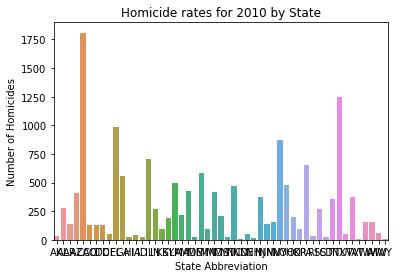

In [61]:

sns.barplot(x= 'State Abbreviation', y= 'Number of Homicides', data= murder_by_state_2010)
plt.title('Homicide rates for 2010 by State')
plt.show()